__This project aims to explore the neighborhood of New York city and the corresponding prices of listing by Airbnb__

Often tourists and travelers have problem in identifying the best stay that accommodates their budget as well as a place that is near to many popular venues in the city they are visiting. This project aims at classifying the different price listings of Airbnb in the neighborhood of New York city. New York city has a total of five boroughs and at least 150 neighborhoods. We will be using the New York city’s geospatial data and the Foursquare API to explore the most popular venues in New York city and the corresponding Airbnb’s price listings in that neighbor hood and categorize the prices as HIGH_RANGE, MID_RANGE and LOW_RANGE.

In [1]:
import pandas as pd
import numpy as np

In [2]:
abnb_ny = pd.read_csv("AB_NYC_2019.csv")
abnb_ny.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


# Exploratory Data Analysis

Let us perform some basic exploratory data analytics of the above data to get a sense of what the data is trying to convey

In [3]:
abnb_ny.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [4]:
#examine the missing data
missing_data = abnb_ny.isnull()
missing_data.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [5]:
#find the number of missing values in each column
for c in missing_data.columns.values.tolist():
    print(c)
    print(missing_data[c].value_counts())
    print("")

id
False    48895
Name: id, dtype: int64

name
False    48879
True        16
Name: name, dtype: int64

host_id
False    48895
Name: host_id, dtype: int64

host_name
False    48874
True        21
Name: host_name, dtype: int64

neighbourhood_group
False    48895
Name: neighbourhood_group, dtype: int64

neighbourhood
False    48895
Name: neighbourhood, dtype: int64

latitude
False    48895
Name: latitude, dtype: int64

longitude
False    48895
Name: longitude, dtype: int64

room_type
False    48895
Name: room_type, dtype: int64

price
False    48895
Name: price, dtype: int64

minimum_nights
False    48895
Name: minimum_nights, dtype: int64

number_of_reviews
False    48895
Name: number_of_reviews, dtype: int64

last_review
False    38843
True     10052
Name: last_review, dtype: int64

reviews_per_month
False    38843
True     10052
Name: reviews_per_month, dtype: int64

calculated_host_listings_count
False    48895
Name: calculated_host_listings_count, dtype: int64

availability_365
False

For the rows where we do not know the name and hostname let us remove those rows as chances are they could be false listings or
not available currently.

In [6]:
abnb_ny.dropna(subset=["name","host_name",'last_review'], axis=0, inplace=True)

# reset index, because we droped two rows
abnb_ny.reset_index(drop=True, inplace=True)

Now reviews_per_month column has 10052 missing values in all, we can observe that reviews_per_month is dependent on numer_of_reviews so wherever number_of_reviews is 0, last_review is NaN, reviews_per_month is NaN. Let us replace NaN in reviews_per_month with 0. The last_review column is not necessary as of now


In [7]:
abnb_ny['reviews_per_month'].replace(np.nan, 0, inplace=True)

In [8]:
abnb_ny.drop(abnb_ny[abnb_ny['price'] == 0].index, inplace = True) 

In [9]:
abnb_ny.shape

(38811, 16)

__Let us find answers for the following questions through EDA of the above data set__

__Question 1: Which neighborhood group or borrough of New York city has the highest price?__

In [10]:
#neighborhood groups or boroughs of New York city
abnb_ny["neighbourhood_group"].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [11]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
mpl.style.use('ggplot')

In [12]:
price_by_borough =abnb_ny.groupby(['neighbourhood_group']).max()
data=price_by_borough.reset_index()[["neighbourhood_group","price"]]


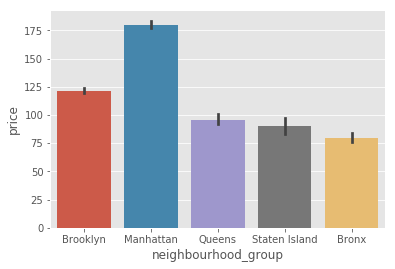

In [13]:
sns.barplot(x='neighbourhood_group',y='price',data=abnb_ny)

Therefore, we can see that Manhattan borough have the highest average price overall. 

__Question 2: How does the price vary in different boroughs by room_type?__

In [14]:
df_group_one = abnb_ny[['neighbourhood_group','room_type','price','neighbourhood']]
df_group_two = df_group_one.groupby(['neighbourhood_group','room_type'],as_index=False).mean()
df_group_two

,neighbourhood_group,room_type,price
0,Bronx,Entire home/apt,120.938312
1,Bronx,Private room,57.202677
2,Bronx,Shared room,56.930233
3,Brooklyn,Entire home/apt,171.302893
4,Brooklyn,Private room,73.404684
5,Brooklyn,Shared room,45.774306
6,Manhattan,Entire home/apt,230.200964
7,Manhattan,Private room,106.607488
8,Manhattan,Shared room,77.980337
9,Queens,Entire home/apt,139.225603


In [15]:
grouped_pivot = df_group_two.pivot(index='neighbourhood_group',columns='room_type')
grouped_pivot

price                         
room_type           Entire home/apt Private room Shared room
neighbourhood_group                                         
Bronx                    120.938312    57.202677   56.930233
Brooklyn                 171.302893    73.404684   45.774306
Manhattan                230.200964   106.607488   77.980337
Queens                   139.225603    69.302838   64.467105
Staten Island            125.366667    57.584906   57.600000

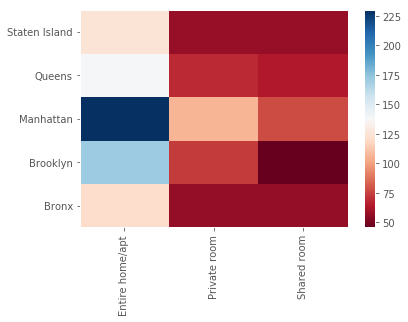

In [16]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

We see that Entire home/apt in Manhattan has the hihgest price compared to other boroughs

__Question 3: Which neighbourhood has the highest average price for different room types?__

In [17]:
df = abnb_ny[['neighbourhood_group','room_type','price','neighbourhood']]
df_group = df.groupby(['neighbourhood_group','neighbourhood','room_type'],as_index=False).mean()
df_group.sort_values(['price'],ascending=False,inplace=True)
new=df_group[df_group['room_type']=='Entire home/apt']
new


,neighbourhood_group,neighbourhood,room_type,price
217,Brooklyn,Sea Gate,Entire home/apt,611.000000
309,Manhattan,Tribeca,Entire home/apt,556.058824
333,Queens,Bayside,Entire home/apt,380.250000
301,Manhattan,SoHo,Entire home/apt,357.453125
256,Manhattan,Flatiron District,Entire home/apt,323.234043
...,...,...,...,...
7,Bronx,Bronxdale,Entire home/apt,73.000000
468,Staten Island,Grant City,Entire home/apt,70.666667
462,Staten Island,Eltingville,Entire home/apt,70.000000
109,Bronx,Woodlawn,Entire home/apt,65.500000


Riverdale has highest average price for a shared room and private room, while Fort Wadsworth has the highest average price for
Entire home/apt room type

# Segmenting and clustering the neighbourhoods of New York city

Let us first create a table showing the average price of listing in each borough

In [18]:
avg_borough_price = abnb_ny[['neighbourhood_group','price']]
df_group_price = avg_borough_price.groupby(['neighbourhood_group'],as_index=False).mean()
df_group_price

,neighbourhood_group,price
0,Bronx,79.649886
1,Brooklyn,121.529823
2,Manhattan,180.071596
3,Queens,95.783683
4,Staten Island,89.964968


Now that we have done basic EDA, let us focus on analysing the popular venues around these boroughs. Before that let us analyse
the the frequency of prices in different ranges.

In [19]:
df = abnb_ny[['neighbourhood_group','price','neighbourhood']]
df_group = df.groupby(['neighbourhood_group','neighbourhood'],as_index=False).mean()
df_group


,neighbourhood_group,neighbourhood,price
0,Bronx,Allerton,90.594595
1,Bronx,Baychester,78.000000
2,Bronx,Belmont,79.450000
3,Bronx,Bronxdale,51.875000
4,Bronx,Castle Hill,74.000000
...,...,...,...
213,Staten Island,Tompkinsville,77.250000
214,Staten Island,Tottenville,160.800000
215,Staten Island,West Brighton,66.250000
216,Staten Island,Westerleigh,71.500000


Text(0.5, 1.0, 'price bins')

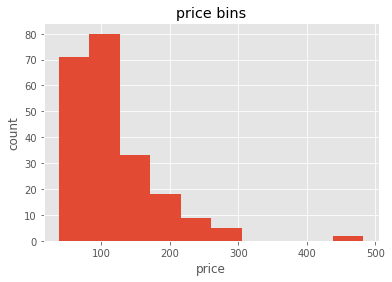

In [20]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(df_group["price"])

# set x/y labels and plot title
plt.pyplot.xlabel("price")
plt.pyplot.ylabel("count")
plt.pyplot.title("price bins")

In [21]:
bins = np.linspace(min(df_group['price']), max(df_group['price']), 5)
bins

array([ 38.   , 149.125, 260.25 , 371.375, 482.5  ])

In [22]:
group_names = ['Low', 'Mid-1','Mid-2', 'High']

So the ranges are as follows:
    
    1. Low : <= 150
    
    2. Mid-1 : >=150 and , <=260
        
    3. Mid-2 : >=260 and <=371
    
    4. High : >=371, <=482

In [100]:
df_group['price-binned'] = pd.cut(df_group['price'], bins, labels=group_names, include_lowest=True )
df_group[['price','price-binned']].head(20)

,price,price-binned
0,90.594595,Low
1,78.000000,Low
2,79.450000,Low
3,51.875000,Low
4,74.000000,Low
5,94.266667,Low
6,68.937500,Low
7,101.333333,Low
8,77.500000,Low
9,77.951220,Low


In [101]:
df_group['price-binned'].value_counts()

Low      166
Mid-1     45
Mid-2      5
High       2
Name: price-binned, dtype: int64

Text(0.5, 1.0, 'price bins')

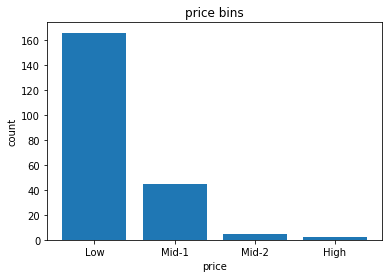

In [103]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
pyplot.bar(group_names, df_group["price-binned"].value_counts())

# set x/y labels and plot title
plt.pyplot.xlabel("price")
plt.pyplot.ylabel("count")
plt.pyplot.title("price bins")

In [98]:
df_group.head()

,neighbourhood_group,neighbourhood,price,price-binned
0,Bronx,Allerton,90.594595,Low
1,Bronx,Baychester,78.000000,Low
2,Bronx,Belmont,79.450000,Low
3,Bronx,Bronxdale,51.875000,Low
4,Bronx,Castle Hill,74.000000,Low


In [27]:
# import all dependencies
from geopy.geocoders import Nominatim
from pandas.io.json import json_normalize 
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans
import folium
import pandas as pd 
import requests
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [28]:
#download and read the dataset of New York city
import json

with open('nyu-geojson.json') as f:
    data = json.load(f)
neighborhoods_data = data['features']
neighborhoods_data[0]

{'geometry': {'coordinates': [-73.84720052054902, 40.89470517661],
  'type': 'Point'},
 'geometry_name': 'geom',
 'id': 'nyu_2451_34572.1',
 'properties': {'annoangle': 0.0,
  'annoline1': 'Wakefield',
  'annoline2': None,
  'annoline3': None,
  'bbox': [-73.84720052054902,
   40.89470517661,
   -73.84720052054902,
   40.89470517661],
  'borough': 'Bronx',
  'name': 'Wakefield',
  'stacked': 1},
 'type': 'Feature'}

In [29]:
# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)

Then let's loop through the data and fill the dataframe one row at a time.

In [30]:
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

In [31]:
neighborhoods.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [32]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(neighborhoods['Borough'].unique()),
        neighborhoods.shape[0]
    )
)

The dataframe has 5 boroughs and 306 neighborhoods.


#### Use geopy library to get the latitude and longitude values of New York City.

In [33]:
address = 'New York City, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


#### Create a map of New York with neighborhoods superimposed on top.

In [34]:
# create map of New York using latitude and longitude values
map_newyork = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Borough'], neighborhoods['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
map_newyork

Next, we are going to start utilizing the Foursquare API to explore the neighborhoods and segment them.

In [35]:
CLIENT_ID = 'BKNPDYB2P4QYFPVZLIKXUBKW2JEPYMTPPYGM5YDG0QWZX2TD' # your Foursquare ID
CLIENT_SECRET = 'YXHFYPTWXZYNUXYJPOBKOCMC2OADD1ZWLUOXGQ443Y5OLLL0' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

# Exploring the neighbourhoods of each borough and obtaining the top 10 venues in each borough

Now we will see the top 10 venues in each of the boroughs using the FourSquare API

In [36]:
address = 'New York City, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


In [37]:
def getNearby(names, latitudes, longitudes, radius=500, LIMIT=100):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
       
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Borough', 
                  'Borough Latitude', 
                  'Borough Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)


In [38]:
ny_venues = getNearby(names=neighborhoods['Borough'],
                                   latitudes=neighborhoods['Latitude'],
                                   longitudes=neighborhoods['Longitude']
                                  )

In [39]:
ny_venues.head()

,Borough,Borough Latitude,Borough Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Bronx,40.894705,-73.847201,Lollipops Gelato,40.894123,-73.845892,Dessert Shop
1,Bronx,40.894705,-73.847201,Walgreens,40.896528,-73.844700,Pharmacy
2,Bronx,40.894705,-73.847201,Carvel Ice Cream,40.890487,-73.848568,Ice Cream Shop
3,Bronx,40.894705,-73.847201,Rite Aid,40.896649,-73.844846,Pharmacy
4,Bronx,40.894705,-73.847201,Dunkin',40.890459,-73.849089,Donut Shop


In [40]:
ny_venues.shape

(9986, 7)

In [41]:
summary = ny_venues.groupby('Borough').count().reset_index()
summary['Count'] = summary['Venue']
summary = summary.drop(['Borough Latitude', 'Borough Longitude', 'Venue', 'Venue Latitude', 'Venue Longitude','Venue Category'], axis=1)
summary = summary.sort_values('Count').reset_index(drop=True)
summary.head()

,Borough,Count
0,Staten Island,850
1,Bronx,1183
2,Queens,2089
3,Brooklyn,2724
4,Manhattan,3140


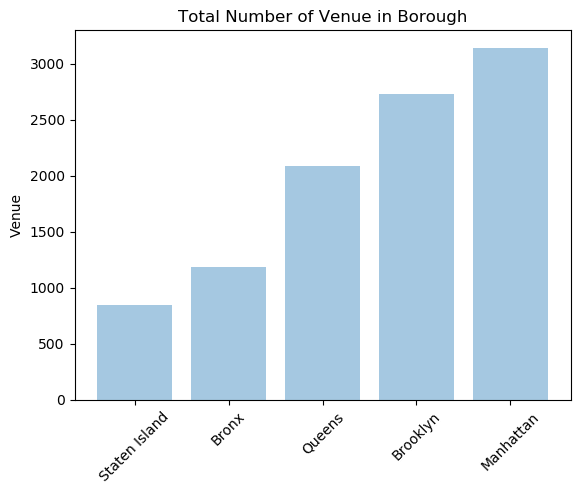

In [42]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
objects = summary.Borough
y_pos = np.arange(len(objects))
performance = summary.Count

plt.bar(y_pos, performance, align='center', alpha=0.4)
plt.xticks(y_pos, objects)
plt.ylabel('Venue')
plt.title('Total Number of Venue in Borough')
plt.xticks(rotation=45)

plt.show()

The above plot shows that manhattan has the highest number of venues in New York city

In [43]:
print('There are {} uniques categories.'.format(len(ny_venues['Venue Category'].unique())))

There are 429 uniques categories.


#### Now let us find the top 10 most common venue in each borough

In [44]:
# one hot encoding
ny_onehot = pd.get_dummies(ny_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
ny_onehot['Borough'] = ny_venues['Borough'] 

# move neighborhood column to the first column
list_column = ny_onehot.columns.tolist()
number_column = int(list_column.index('Borough'))
list_column = [list_column[number_column]] + list_column[:number_column] + list_column[number_column+1:] 
ny_onehot = ny_onehot[list_column]

ny_onehot.head()

,Borough,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,Airport Terminal,American Restaurant,Antique Shop,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Auditorium,Australian Restaurant,Austrian Restaurant,Auto Garage,Automotive Shop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Bath House,Beach,Beach Bar,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bike Trail,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bridge,Bubble Tea Shop,Buffet,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Cambodian Restaurant,Camera Store,Campground,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Caucasian Restaurant,Cha Chaan Teng,Check Cashing Service,Cheese Shop,Child Care Service,Chinese Restaurant,Chocolate Shop,Church,Circus,Climbing Gym,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Academic Building,College Arts Building,College Basketball Court,College Bookstore,College Cafeteria,College Theater,Colombian Restaurant,Comedy Club,Comfort Food Restaurant,Comic Shop,Community Center,Concert Hall,Construction & Landscaping,Convenience Store,Cooking School,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Cycle Studio,Czech Restaurant,Dance Studio,Daycare,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distillery,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Dosa Place,Drugstore,Dry Cleaner,Dumpling Restaurant,Duty-free Shop,Eastern European Restaurant,Egyptian Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Entertainment Service,Ethiopian Restaurant,Event Service,Event Space,Exhibit,Eye Doctor,Factory,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Financial or Legal Service,Fish & Chips Shop,Fish Market,Fishing Store,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Stand,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Gluten-free Restaurant,Go Kart Track,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Halal Restaurant,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Heliport,Herbs & Spices Store,High School,Himalayan Restaurant,Historic Site,History Museum,Hobby Shop,Home Service,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotel Pool,Hotpot Restaurant,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Indonesian Restaurant,Indoor Play Area,Insurance Office,Intersection,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Kitchen Supply Store,Korean Restaurant,Kosher Restaurant,Lake,Latin American Restaurant,Laundromat,Laundry Service,Lawyer,Lebanese Restaurant,Library,Lingerie Store,Liquor Store,Lounge,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Mattress Store,Medical Center,Mediterranean Restaurant,Memorial Site,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Motel,Motorcycle Shop,Movie Theater,Moving Target,Multiplex,Museum,Music School,Music Store,Music Venue,Nail Salon,Neighborhood,New American Restaurant,Newsstand,Nightclub,Nightlife Spot,Non-Profit,Noodle House,Offic

In [45]:
ny_grouped = ny_onehot.groupby('Borough').mean().reset_index()
ny_grouped.head()

,Borough,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,Airport Terminal,American Restaurant,Antique Shop,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Auditorium,Australian Restaurant,Austrian Restaurant,Auto Garage,Automotive Shop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Bath House,Beach,Beach Bar,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bike Trail,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bridge,Bubble Tea Shop,Buffet,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Cambodian Restaurant,Camera Store,Campground,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Caucasian Restaurant,Cha Chaan Teng,Check Cashing Service,Cheese Shop,Child Care Service,Chinese Restaurant,Chocolate Shop,Church,Circus,Climbing Gym,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Academic Building,College Arts Building,College Basketball Court,College Bookstore,College Cafeteria,College Theater,Colombian Restaurant,Comedy Club,Comfort Food Restaurant,Comic Shop,Community Center,Concert Hall,Construction & Landscaping,Convenience Store,Cooking School,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Cycle Studio,Czech Restaurant,Dance Studio,Daycare,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distillery,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Dosa Place,Drugstore,Dry Cleaner,Dumpling Restaurant,Duty-free Shop,Eastern European Restaurant,Egyptian Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Entertainment Service,Ethiopian Restaurant,Event Service,Event Space,Exhibit,Eye Doctor,Factory,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Financial or Legal Service,Fish & Chips Shop,Fish Market,Fishing Store,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Stand,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Gluten-free Restaurant,Go Kart Track,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Halal Restaurant,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Heliport,Herbs & Spices Store,High School,Himalayan Restaurant,Historic Site,History Museum,Hobby Shop,Home Service,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotel Pool,Hotpot Restaurant,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Indonesian Restaurant,Indoor Play Area,Insurance Office,Intersection,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Kitchen Supply Store,Korean Restaurant,Kosher Restaurant,Lake,Latin American Restaurant,Laundromat,Laundry Service,Lawyer,Lebanese Restaurant,Library,Lingerie Store,Liquor Store,Lounge,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Mattress Store,Medical Center,Mediterranean Restaurant,Memorial Site,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Motel,Motorcycle Shop,Movie Theater,Moving Target,Multiplex,Museum,Music School,Music Store,Music Venue,Nail Salon,Neighborhood,New American Restaurant,Newsstand,Nightclub,Nightlife Spot,Non-Profit,Noodle House,Offic

In [46]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [47]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Borough']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
boroughs_venues_sorted = pd.DataFrame(columns=columns)
boroughs_venues_sorted['Borough'] = ny_grouped['Borough']

for ind in np.arange(ny_grouped.shape[0]):
    boroughs_venues_sorted.iloc[ind, 1:] = return_most_common_venues(ny_grouped.iloc[ind, :], num_top_venues)

boroughs_venues_sorted.head()

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bronx,Pizza Place,Deli / Bodega,Pharmacy,Donut Shop,Grocery Store,Italian Restaurant,Spanish Restaurant,Sandwich Place,Bank,Bus Station
1,Brooklyn,Pizza Place,Coffee Shop,Bar,Deli / Bodega,Italian Restaurant,Bakery,Grocery Store,Mexican Restaurant,Chinese Restaurant,Ice Cream Shop
2,Manhattan,Coffee Shop,Italian Restaurant,Café,Pizza Place,Park,Bakery,American Restaurant,Bar,Hotel,Gym
3,Queens,Pizza Place,Deli / Bodega,Chinese Restaurant,Bakery,Donut Shop,Bar,Bank,Pharmacy,Sandwich Place,Italian Restaurant
4,Staten Island,Pizza Place,Bus Stop,Deli / Bodega,Italian Restaurant,Pharmacy,Coffee Shop,Sandwich Place,Bagel Shop,Grocery Store,Chinese Restaurant


# Cluster the neighbourhoods of the borough with the highest number of venues

So from the above discussion we saw that Manhattan has the most number of venues ,however since our intention is to explore the Airbnb's
price listing in a particular borough, we will see from our Airbnb's data that count of listings per host and their corresponding neighborhood borough and then
decide which borough to cluster

In [48]:
groups= abnb_ny[['calculated_host_listings_count','neighbourhood','neighbourhood_group']]
grouped = groups.groupby(['neighbourhood','neighbourhood_group']).mean().reset_index()
grouped.sort_values('calculated_host_listings_count',ascending=False)

,neighbourhood,neighbourhood_group,calculated_host_listings_count
73,Financial District,Manhattan,118.245580
136,Murray Hill,Manhattan,45.469453
189,Theater District,Manhattan,20.655405
65,Eastchester,Bronx,13.000000
217,Woodside,Queens,12.100000
67,Edgemere,Queens,11.750000
195,Tribeca,Manhattan,9.590909
71,Far Rockaway,Queens,9.272727
94,Hell's Kitchen,Manhattan,9.200916
126,Midtown,Manhattan,9.122718


Thus Manhattan has the highest number of listings so we will cluster the neighbourhood of Manhattan and examine each cluster.

In [49]:
address = 'Manhattan, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Manhattan are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Manhattan are 40.7896239, -73.9598939.


In [50]:
manhattan_data = neighborhoods[neighborhoods['Borough'] == 'Manhattan'].reset_index(drop=True)
manhattan_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,Manhattan,Marble Hill,40.876551,-73.910660
1,Manhattan,Chinatown,40.715618,-73.994279
2,Manhattan,Washington Heights,40.851903,-73.936900
3,Manhattan,Inwood,40.867684,-73.921210
4,Manhattan,Hamilton Heights,40.823604,-73.949688


In [51]:
# create map of Manhattan using latitude and longitude values
map_manhattan = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(manhattan_data['Latitude'], manhattan_data['Longitude'], manhattan_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_manhattan)  
    
map_manhattan

In [56]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    LIMIT = 50
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [57]:
manhattan_venues = getNearbyVenues(names=manhattan_data['Neighborhood'],
                                   latitudes=manhattan_data['Latitude'],
                                   longitudes=manhattan_data['Longitude']
                                  )

Let's check how many venues were returned for each neighborhood

In [58]:
manhattan_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Marble Hill,40.876551,-73.91066,Arturo's,40.874412,-73.910271,Pizza Place
1,Marble Hill,40.876551,-73.91066,Bikram Yoga,40.876844,-73.906204,Yoga Studio
2,Marble Hill,40.876551,-73.91066,Tibbett Diner,40.880404,-73.908937,Diner
3,Marble Hill,40.876551,-73.91066,Starbucks,40.877531,-73.905582,Coffee Shop
4,Marble Hill,40.876551,-73.91066,Dunkin',40.877136,-73.906666,Donut Shop


#### Let's find out how many unique categories can be curated from all the returned venues

In [59]:
print('There are {} uniques categories.'.format(len(manhattan_venues['Venue Category'].unique())))

There are 282 uniques categories.


# Analyze Each Neighborhood

In [60]:
# one hot encoding
manhattan_onehot = pd.get_dummies(manhattan_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
manhattan_onehot['Neighborhood'] = manhattan_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [manhattan_onehot.columns[-1]] + list(manhattan_onehot.columns[:-1])
manhattan_onehot = manhattan_onehot[fixed_columns]

manhattan_onehot.head()

,Neighborhood,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,American Restaurant,Antique Shop,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auditorium,Australian Restaurant,Austrian Restaurant,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bike Trail,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Boxing Gym,Breakfast Spot,Bridge,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Butcher,Cafeteria,Café,Camera Store,Candy Store,Caribbean Restaurant,Caucasian Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Circus,Climbing Gym,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Academic Building,College Arts Building,College Bookstore,College Cafeteria,College Theater,Comedy Club,Community Center,Concert Hall,Convenience Store,Cooking School,Cosmetics Shop,Cuban Restaurant,Cupcake Shop,Cycle Studio,Czech Restaurant,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Doctor's Office,Dog Run,Donut Shop,Dry Cleaner,Dumpling Restaurant,Duty-free Shop,Egyptian Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Event Space,Exhibit,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish Market,Flower Shop,Food & Drink Shop,Food Court,Food Stand,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Garden Center,Gas Station,Gastropub,General Entertainment,German Restaurant,Gift Shop,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Heliport,Himalayan Restaurant,Historic Site,History Museum,Hobby Shop,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Korean Restaurant,Latin American Restaurant,Lebanese Restaurant,Library,Lingerie Store,Liquor Store,Lounge,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Medical Center,Mediterranean Restaurant,Memorial Site,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Music School,Music Venue,Nail Salon,New American Restaurant,Newsstand,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Outdoor Sculpture,Outdoors & Recreation,Paella Restaurant,Paper / Office Supplies Store,Park,Pedestrian Plaza,Performing Arts Venue,Peruvian Restaurant,Pet Café,Pet Service,Pet Store,Pharmacy,Photography Studio,Pie Shop,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Pool,Pub,Public Art,Ramen Restaurant,Record Shop,Residential Building (Apartment / Condo),Restaurant,Rock Club,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,School,Sculpture Garden,Seafood Restaurant,Shanghai Restaurant,Shipping Store,Shoe Store,Shopping Mall,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Sports Club,Steakhouse,Strip Club,Supermarket,Supplement Shop,Sushi Restaurant,Swiss Restaurant,Szechuan Restaurant,Taco Place,Tailor Shop,Taiwanese Restaurant,Tapas Restaurant,Tattoo Parlor,Tea Room,Tennis Court,Tennis Stadium,Thai Restaurant,Theater,Theme Restaurant,Thrift / Vintage Store,Tiki Bar,Tourist Information Center,Toy / Game Store,Trail,Turkish Restaurant,Udon Restaurant,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Veterinarian,Video Game Stor

#### Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [61]:
manhattan_grouped = manhattan_onehot.groupby('Neighborhood').mean().reset_index()
manhattan_grouped.head()

,Neighborhood,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,American Restaurant,Antique Shop,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auditorium,Australian Restaurant,Austrian Restaurant,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bike Trail,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Boxing Gym,Breakfast Spot,Bridge,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Butcher,Cafeteria,Café,Camera Store,Candy Store,Caribbean Restaurant,Caucasian Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Circus,Climbing Gym,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Academic Building,College Arts Building,College Bookstore,College Cafeteria,College Theater,Comedy Club,Community Center,Concert Hall,Convenience Store,Cooking School,Cosmetics Shop,Cuban Restaurant,Cupcake Shop,Cycle Studio,Czech Restaurant,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Doctor's Office,Dog Run,Donut Shop,Dry Cleaner,Dumpling Restaurant,Duty-free Shop,Egyptian Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Event Space,Exhibit,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish Market,Flower Shop,Food & Drink Shop,Food Court,Food Stand,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Garden Center,Gas Station,Gastropub,General Entertainment,German Restaurant,Gift Shop,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Heliport,Himalayan Restaurant,Historic Site,History Museum,Hobby Shop,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Korean Restaurant,Latin American Restaurant,Lebanese Restaurant,Library,Lingerie Store,Liquor Store,Lounge,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Medical Center,Mediterranean Restaurant,Memorial Site,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Music School,Music Venue,Nail Salon,New American Restaurant,Newsstand,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Outdoor Sculpture,Outdoors & Recreation,Paella Restaurant,Paper / Office Supplies Store,Park,Pedestrian Plaza,Performing Arts Venue,Peruvian Restaurant,Pet Café,Pet Service,Pet Store,Pharmacy,Photography Studio,Pie Shop,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Pool,Pub,Public Art,Ramen Restaurant,Record Shop,Residential Building (Apartment / Condo),Restaurant,Rock Club,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,School,Sculpture Garden,Seafood Restaurant,Shanghai Restaurant,Shipping Store,Shoe Store,Shopping Mall,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Sports Club,Steakhouse,Strip Club,Supermarket,Supplement Shop,Sushi Restaurant,Swiss Restaurant,Szechuan Restaurant,Taco Place,Tailor Shop,Taiwanese Restaurant,Tapas Restaurant,Tattoo Parlor,Tea Room,Tennis Court,Tennis Stadium,Thai Restaurant,Theater,Theme Restaurant,Thrift / Vintage Store,Tiki Bar,Tourist Information Center,Toy / Game Store,Trail,Turkish Restaurant,Udon Restaurant,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Veterinarian,Video Game Stor

#### Let's put that into a pandas dataframe


Find top 10 venues

In [62]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = manhattan_grouped['Neighborhood']

for ind in np.arange(manhattan_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(manhattan_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Battery Park City,Park,Coffee Shop,Memorial Site,Hotel,Plaza,Gourmet Shop,Gym,Shopping Mall,Food Court,Pub
1,Carnegie Hill,Gym / Fitness Center,Bookstore,Coffee Shop,Café,Yoga Studio,French Restaurant,Gym,Italian Restaurant,Pizza Place,Wine Shop
2,Central Harlem,African Restaurant,Fried Chicken Joint,French Restaurant,Bar,Gym / Fitness Center,Seafood Restaurant,Chinese Restaurant,American Restaurant,Cafeteria,Cocktail Bar
3,Chelsea,Coffee Shop,Ice Cream Shop,American Restaurant,Market,Italian Restaurant,Theater,Speakeasy,French Restaurant,Cupcake Shop,Cocktail Bar
4,Chinatown,Chinese Restaurant,Spa,Bubble Tea Shop,Hotpot Restaurant,Greek Restaurant,Noodle House,Ice Cream Shop,Boutique,Salon / Barbershop,Sandwich Place


# Cluster the neighbourhoods of Manhattan

We will use K-means algorithm to cluster the neighbourhood of Manhattan.The optimal value of k is found 
by using the elbow method.
The elbow method runs k-means clustering on the dataset for a range of values for k (say from 1-10) and then for each value of k computes an average score for all clusters. By default, the distortion score is computed, the sum of square distances from each point to its assigned center. 

In [63]:
# set number of clusters
kclusters = 5

manhattan_grouped_clustering = manhattan_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(manhattan_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([3, 2, 2, 1, 0, 2, 2, 3, 1, 1])

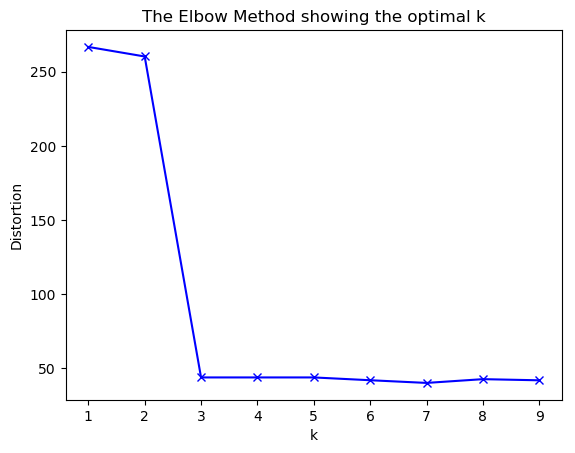

In [64]:
from scipy.spatial.distance import cdist

distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=0).fit(manhattan_grouped_clustering)
    #kmeanModel.fit(istanbul_grouped_clustering)
    distortions.append(sum(np.min(cdist(manhattan_grouped_clustering, kmeanModel.cluster_centers_, 'canberra'), axis=1)) / manhattan_grouped_clustering.shape[0])

#There are different metric distance function for spatial distance. 
#I choose correlation instaed of euclidean because the canberra function gives me more clear view of elbow break point.

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

To determine the optimal number of clusters, we have to select the value of k at the “elbow” ie the point after which the distortion/inertia start decreasing in a linear fashion. Thus for the given data, we conclude that the optimal number of clusters for the data is 5.

#### Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [65]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

manhattan_merged = manhattan_data

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
manhattan_merged = manhattan_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

manhattan_merged.head() # check the last columns!

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Manhattan,Marble Hill,40.876551,-73.910660,1,Sandwich Place,Coffee Shop,Gym,Yoga Studio,Steakhouse,Supplement Shop,Seafood Restaurant,Tennis Stadium,Donut Shop,Kids Store
1,Manhattan,Chinatown,40.715618,-73.994279,0,Chinese Restaurant,Spa,Bubble Tea Shop,Hotpot Restaurant,Greek Restaurant,Noodle House,Ice Cream Shop,Boutique,Salon / Barbershop,Sandwich Place
2,Manhattan,Washington Heights,40.851903,-73.936900,3,Café,Bakery,Spanish Restaurant,Wine Shop,Coffee Shop,Park,Tapas Restaurant,Deli / Bodega,New American Restaurant,Mobile Phone Shop
3,Manhattan,Inwood,40.867684,-73.921210,3,Mexican Restaurant,Café,Restaurant,Lounge,Park,Deli / Bodega,Bakery,Chinese Restaurant,Spanish Restaurant,American Restaurant
4,Manhattan,Hamilton Heights,40.823604,-73.949688,3,Pizza Place,Coffee Shop,Café,Deli / Bodega,Mexican Restaurant,Yoga Studio,Bakery,Caribbean Restaurant,School,Sushi Restaurant


Finally, let's visualize the resulting clusters

In [66]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(manhattan_merged['Latitude'], manhattan_merged['Longitude'], manhattan_merged['Neighborhood'], manhattan_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

Let us now combine the average price of the neighbourhodd that we discovered earlier and the above clustered data and create a
cloropeth map

In [104]:
final = df_group[df_group['neighbourhood_group']=='Manhattan']
final =final[['neighbourhood','price-binned']]
final.head()

,neighbourhood,price-binned
95,Battery Park City,Mid-1
96,Chelsea,Mid-1
97,Chinatown,Mid-1
98,Civic Center,Mid-1
99,East Harlem,Low


In [68]:
final = final.rename(columns={"neighbourhood": "Neighborhood"})

In [77]:
result = pd.merge(manhattan_merged,final,on='Neighborhood',how='left')
result.head()

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,price-binned
0,Manhattan,Marble Hill,40.876551,-73.910660,1,Sandwich Place,Coffee Shop,Gym,Yoga Studio,Steakhouse,Supplement Shop,Seafood Restaurant,Tennis Stadium,Donut Shop,Kids Store,Low
1,Manhattan,Chinatown,40.715618,-73.994279,0,Chinese Restaurant,Spa,Bubble Tea Shop,Hotpot Restaurant,Greek Restaurant,Noodle House,Ice Cream Shop,Boutique,Salon / Barbershop,Sandwich Place,Mid-1
2,Manhattan,Washington Heights,40.851903,-73.936900,3,Café,Bakery,Spanish Restaurant,Wine Shop,Coffee Shop,Park,Tapas Restaurant,Deli / Bodega,New American Restaurant,Mobile Phone Shop,Low
3,Manhattan,Inwood,40.867684,-73.921210,3,Mexican Restaurant,Café,Restaurant,Lounge,Park,Deli / Bodega,Bakery,Chinese Restaurant,Spanish Restaurant,American Restaurant,Low
4,Manhattan,Hamilton Heights,40.823604,-73.949688,3,Pizza Place,Coffee Shop,Café,Deli / Bodega,Mexican Restaurant,Yoga Studio,Bakery,Caribbean Restaurant,School,Sushi Restaurant,NaN


In [78]:
result.iloc[:,[1,4,5,6,7,15]]

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,price-binned
0,Marble Hill,1,Sandwich Place,Coffee Shop,Gym,Low
1,Chinatown,0,Chinese Restaurant,Spa,Bubble Tea Shop,Mid-1
2,Washington Heights,3,Café,Bakery,Spanish Restaurant,Low
3,Inwood,3,Mexican Restaurant,Café,Restaurant,Low
4,Hamilton Heights,3,Pizza Place,Coffee Shop,Café,NaN
5,Manhattanville,3,Coffee Shop,Italian Restaurant,Mexican Restaurant,NaN
6,Central Harlem,2,African Restaurant,Fried Chicken Joint,French Restaurant,NaN
7,East Harlem,3,Mexican Restaurant,Thai Restaurant,Bakery,Low
8,Upper East Side,1,Italian Restaurant,French Restaurant,Bakery,Mid-1
9,Yorkville,3,Italian Restaurant,Gym,Deli / Bodega,NaN


# Examine the clusters

#### Cluster 1

In [87]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 0, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Chinatown,Chinese Restaurant,Spa,Bubble Tea Shop,Hotpot Restaurant,Greek Restaurant,Noodle House,Ice Cream Shop,Boutique,Salon / Barbershop,Sandwich Place
21,Tribeca,Wine Bar,Greek Restaurant,Café,Steakhouse,Park,Spa,Men's Store,American Restaurant,Hotel,Scenic Lookout
33,Midtown South,Korean Restaurant,Hotel,Dessert Shop,Hotel Bar,Cocktail Bar,Gym / Fitness Center,Japanese Restaurant,Scenic Lookout,Cosmetics Shop,Flower Shop


#### Cluster 2

In [89]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 1, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Marble Hill,Sandwich Place,Coffee Shop,Gym,Yoga Studio,Steakhouse,Supplement Shop,Seafood Restaurant,Tennis Stadium,Donut Shop,Kids Store
8,Upper East Side,Italian Restaurant,French Restaurant,Bakery,Sushi Restaurant,Exhibit,Art Gallery,Yoga Studio,Gym / Fitness Center,Hotel,Shoe Store
12,Upper West Side,Italian Restaurant,Bakery,Thai Restaurant,Pub,Ice Cream Shop,Wine Bar,Indian Restaurant,American Restaurant,Seafood Restaurant,Bar
17,Chelsea,Coffee Shop,Ice Cream Shop,American Restaurant,Market,Italian Restaurant,Theater,Speakeasy,French Restaurant,Cupcake Shop,Cocktail Bar
18,Greenwich Village,Italian Restaurant,Café,Sushi Restaurant,Clothing Store,Gourmet Shop,French Restaurant,Ice Cream Shop,Seafood Restaurant,Pilates Studio,New American Restaurant
19,East Village,Pizza Place,Bar,Vietnamese Restaurant,Korean Restaurant,Speakeasy,Mexican Restaurant,Ice Cream Shop,Dessert Shop,Wine Bar,Filipino Restaurant
22,Little Italy,Pizza Place,Mediterranean Restaurant,Sandwich Place,Ice Cream Shop,Salon / Barbershop,Coffee Shop,Bakery,Thai Restaurant,Café,Wine Bar
23,Soho,Italian Restaurant,Boutique,Coffee Shop,Mediterranean Restaurant,Women's Store,Clothing Store,Dessert Shop,Bakery,Pizza Place,Seafood Restaurant
24,West Village,Italian Restaurant,Cocktail Bar,Wine Bar,New American Restaurant,Jazz Club,Bakery,Coffee Shop,Speakeasy,American Restaurant,Park
25,Manhattan Valley,Coffee Shop,Mexican Restaurant,Bar,Yoga Studio,Pizza Place,Health Food Store,Café,Caribbean Restaurant,Chinese Restaurant,Clothing Store


#### Cluster 3

In [90]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 2, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,Central Harlem,African Restaurant,Fried Chicken Joint,French Restaurant,Bar,Gym / Fitness Center,Seafood Restaurant,Chinese Restaurant,American Restaurant,Cafeteria,Cocktail Bar
10,Lenox Hill,Gym,Gym / Fitness Center,Burger Joint,Bakery,Cocktail Bar,Italian Restaurant,Cycle Studio,Thai Restaurant,Smoke Shop,Gourmet Shop
13,Lincoln Square,Performing Arts Venue,Theater,Concert Hall,Indie Movie Theater,Plaza,Mediterranean Restaurant,French Restaurant,Gym,Café,Cycle Studio
14,Clinton,Theater,Gym / Fitness Center,Wine Shop,Hotel,Lounge,American Restaurant,Gym,Pizza Place,Spa,Mediterranean Restaurant
15,Midtown,Theater,Hotel,Coffee Shop,Bakery,Sporting Goods Shop,Cycle Studio,Tailor Shop,Gym,Clothing Store,Bookstore
16,Murray Hill,Hotel,Sandwich Place,Japanese Restaurant,Coffee Shop,Gym,Jewish Restaurant,Cuban Restaurant,Burger Joint,Bagel Shop,Pub
30,Carnegie Hill,Gym / Fitness Center,Bookstore,Coffee Shop,Café,Yoga Studio,French Restaurant,Gym,Italian Restaurant,Pizza Place,Wine Shop
32,Civic Center,Gym / Fitness Center,Cocktail Bar,Yoga Studio,Park,American Restaurant,Coffee Shop,Gym,French Restaurant,Spa,Burrito Place
38,Flatiron,New American Restaurant,Vegetarian / Vegan Restaurant,Café,Dessert Shop,Coffee Shop,Sporting Goods Shop,Cycle Studio,Spa,Toy / Game Store,Farmers Market
39,Hudson Yards,Hotel,Italian Restaurant,Gym / Fitness Center,Park,Coffee Shop,Gym,Bar,American Restaurant,Café,Pub


#### Cluster 4

In [91]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 3, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Washington Heights,Café,Bakery,Spanish Restaurant,Wine Shop,Coffee Shop,Park,Tapas Restaurant,Deli / Bodega,New American Restaurant,Mobile Phone Shop
3,Inwood,Mexican Restaurant,Café,Restaurant,Lounge,Park,Deli / Bodega,Bakery,Chinese Restaurant,Spanish Restaurant,American Restaurant
4,Hamilton Heights,Pizza Place,Coffee Shop,Café,Deli / Bodega,Mexican Restaurant,Yoga Studio,Bakery,Caribbean Restaurant,School,Sushi Restaurant
5,Manhattanville,Coffee Shop,Italian Restaurant,Mexican Restaurant,Deli / Bodega,Seafood Restaurant,Climbing Gym,Sushi Restaurant,Fried Chicken Joint,Lounge,Liquor Store
7,East Harlem,Mexican Restaurant,Thai Restaurant,Bakery,Latin American Restaurant,Sandwich Place,Spa,Deli / Bodega,Doctor's Office,Beer Bar,Donut Shop
9,Yorkville,Italian Restaurant,Gym,Deli / Bodega,Coffee Shop,Mexican Restaurant,Wine Shop,Park,Hobby Shop,Thai Restaurant,Bagel Shop
11,Roosevelt Island,Park,Soccer Field,Gym,Dry Cleaner,School,Scenic Lookout,Liquor Store,Dog Run,Sandwich Place,Food & Drink Shop
20,Lower East Side,Coffee Shop,Café,Chinese Restaurant,Park,Bakery,Art Gallery,Ramen Restaurant,Cocktail Bar,Sandwich Place,French Restaurant
26,Morningside Heights,Bookstore,American Restaurant,Coffee Shop,Park,Deli / Bodega,Burger Joint,Sandwich Place,Tennis Court,College Cafeteria,Mexican Restaurant
28,Battery Park City,Park,Coffee Shop,Memorial Site,Hotel,Plaza,Gourmet Shop,Gym,Shopping Mall,Food Court,Pub


#### Cluster 5

In [92]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 4, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
37,Stuyvesant Town,Boat or Ferry,Park,Fountain,Baseball Field,Bar,Gas Station,Cocktail Bar,Gym / Fitness Center,Coffee Shop,Harbor / Marina


# CONCLUSION

From the above observations we see that Tribeca neighborhood of Manhattan has the highest price compared to other neighbourhoods.
This anaysis helps travellers to choose a stay from Airbnb  that best suites their budget and also that is near to many popular venues in that area.
Having many popular venues near the stay is husge advantage especially in a city like New York, where commute takes quite a lot of time.

Also we can call the above 5 clusters as:

Cluser 1: ASIAN FOOD

Cluster 2: ITALIAN & CAFE

Cluster 3: RECREATION & FOOD

Cluster 4: RECREATION & CAFE

Cluster 5: RECREATION
#### Future Scope

This project can be extended to find out all venues in other boroughs, predict the price of a new listing etc.,